Иногда бывает полезным сравнить друг с другом различные визуальные представления одних и тех же данных. Matplotlib предлагает концепцию _subplots_ (подизображений?): группа небольших осей, которые могут существовать внутри одного изображения. Эти subplots могут быть встроенными, набором изображений или другими, более сложными, разметками. В этом разделе мы рассмотрим четыре подхода к созданию subplots в Matplotlib.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
import numpy as np

# `plt.axes`: Subplots созданные вручную

Наиболее базовым методом создания осей является использование функции `plt.axes`. Как мы уже видели ранее, по умолчанию эта функция создает стандартный объект axes, который заполняет всё изображение. `plt.axes` также принимает необязательный аргумент, которые представляет из себя список их четырех чисел внутри системы координат изображения. Эти числа представляют `[left, bottom, width, height]` внутри системы координат изображения, которая начинается от 0 в левом нижнем углу изображения до 1 в правом верхнем углу изображения.

Например, мы можем создать встроенные (inset) оси в правом верхнем углу других, уже существующих, осей, путем установки позиции _x_ и _y_ в 0.65 (т.е. начиная от 65% ширины и 65% высоты текущего изображения) и увеличения _x_ и _y_ до 0.2 (т.е. размер осей 20% от ширины и 20% от высоты изображения):

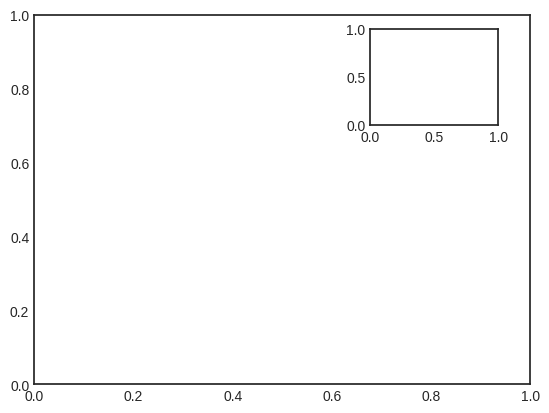

In [3]:
ax1 = plt.axes()  # стандартные оси
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

Эквивалентом этой команды в объектно-ориентированном интерфейсе является `fig.add_axes()`:

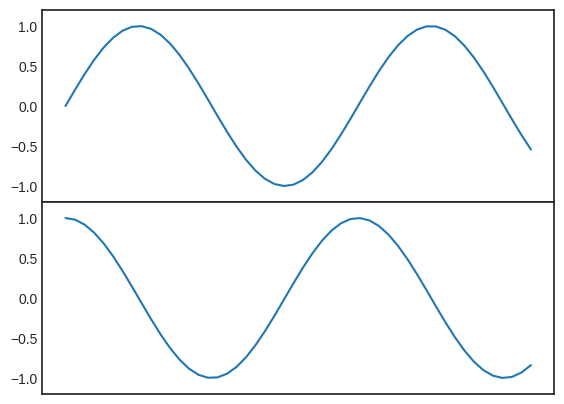

In [5]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

# `plt.subplot`: Простая сетка subplots

Колонки и ряды графиков достаточно частая задача, что Maptlotlib имеет несколько удобных подходов к их созданию. Наиболее низкоуровневый из них это `plt.subplot()`, который создает изображение внутри сетки изображений. Эта команда принимает три целочисленных аргумента - количество рядом, количество колонок и индекс изображения, который начинается в верхнем левом углу и идет до правого нижнего угла:

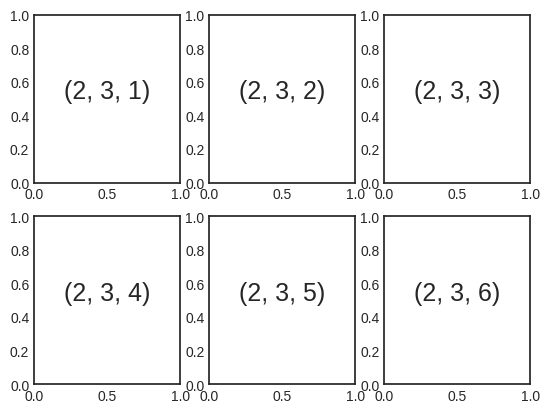

In [6]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i,)), fontsize=18, ha='center')

Команда `plt.subplots_adjust` может быть использована для настройки расстояния между графиками внутри изображения. Следующий код использует объектно-ориентированный эквивалент вышеуказанной команды, `fig.add_subplot()`:

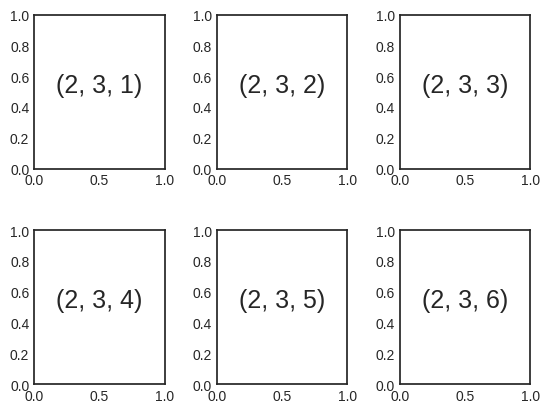

In [7]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

# `plt.subplots`: Вся сетка за одну операцию

Описанный выше подход может быть довольно утомительным если вы хотите создать большую сетку графиков. Для этих целей есть более простой инструмент `plt.subplots()`. Вместо создания отдельных графиков, эта функция создаёт целую сету графиков за одну операцию, возвращая их в массиве NumPy. Аргументы - это количество рядом и количество колонок, также с необязательными аргументами `sharex` и `sharey`, которые позволяют вам указать связи между различными осями.

Здесь мы создаем $2 x 3$ сетку с изображениями, когда все изображения имеют одинаковые оси x и y:

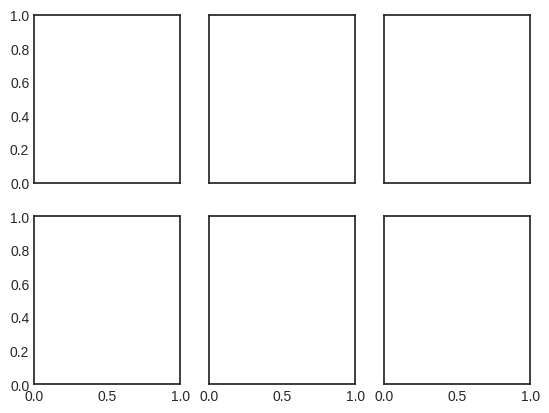

In [8]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Обратите внимание, что указав `sharex` и `sharey` мы автоматически удалили внутренние метки, что сделало изображение более красивым. Возвращаемая сетка экземпляров осей, возвращается в виде массива NumPy, что позволяет удобно указать необходимые оси, используя стандартный подход:

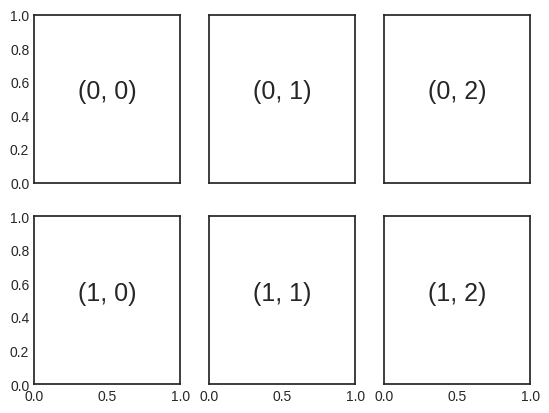

In [9]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

В сравнении с `plt.subplot()`, `plt.subplots()` более соответствует индексации в Python, которая начинается с 0.

# `plt.GridSpec`: Более сложные подходы

Чтобы выйти за пределы равномерной сетки изображений, которая состоит из рядов и колонок, `plt.GridSpec()` - это лучший инструмент. Объект `plt.GridSpec()` не создает непосредственно изображение, это просто удобный интерфейс, который "понимает" команда `plt.subplot`. Например, спецификация сетки для двух рядов и трех колонок, с указанием определенных высоты и ширины, может быть задана как:

In [10]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

Используя это мы можем указать местоположение изображений на сетке используя синтаксис срезов в Python:

<Axes: >

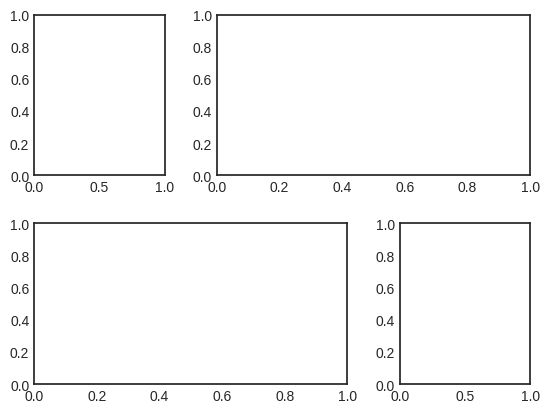

In [12]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

Этот гибкий подход имеет большой разнообразие случаев, в которых он может быть использован. Чаще всего такой подход используется когда требуется построить диаграмму с множеством осей:

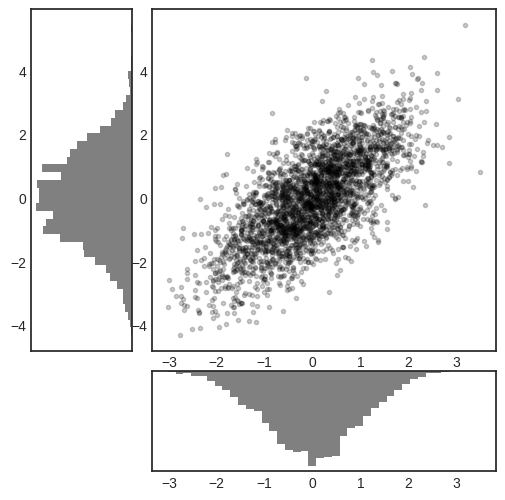

In [15]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()